In [85]:
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [22]:
mndata = MNIST('./samples')

images, labels = mndata.load_training()

testimages, testlabls = mndata.load_testing()

In [23]:
train = np.array(images,dtype='float64')
trainlabels=np.array(labels,dtype='float64')
test = np.array(testimages,dtype='float64')
testlabels=np.array(testlabls,dtype='float64')

# Question 1 (Naive Bayes)

In [24]:
label=[]
for i in range(0,10):
    label.insert(i,train[np.where(trainlabels==i)])

In [25]:
labelmeans=[]
labelvar=[]
for i in range(0,10):
    labelmeans.insert(i,np.mean(label[i], axis=0))
    labelvar.insert(i,np.var(label[i], axis=0))
label_means=np.array(labelmeans)
#label_means=np.transpose(label_means)
label_var=np.array(labelvar)
#label_var=np.transpose(label_var)

In [26]:
trainmean=np.mean(train, axis=0)
trainvar=np.var(train,axis=0)
print(label[0].shape)
print(len(label_means))
print(len(label_var))
print(label_var[8].shape)

(5923, 784)
10
10
(784,)


In [27]:
print(label_means.shape)
print(label_var.shape)

(10, 784)
(10, 784)


In [102]:
def getcondprob(data):
    condprob=[]
    for i in range(0,10):
        condprob.insert(i,np.exp(-np.square(test-label_means[i])/(2*(label_var[i])+100)))
    return condprob

In [103]:
def naive_bayes_condprob(cond_prob):
    prod_condtprob=[]
    for i in range(0,10):
        prod_condtprob.insert(i,np.prod(cond_prob[i],axis=1))
        prod_condprob=np.array(prod_condtprob)
        prod_condprob=np.transpose(prod_condprob)
    return prod_condprob

In [104]:
def naive_bayes_predict(cond_prob):
    #pred=np.empty([10000])
    cp=naive_bayes_condprob(cond_prob)
    #print(cp[555])
    pred=np.argmax(cp, axis=1)
    return pred

In [105]:
def accuracy(labels,truelabels):
    count= len(np.where(labels-truelabels==0)[0])
    return (count/len(labels))*100

In [106]:
cond_prob=getcondprob(test)

In [107]:
print(len(cond_prob))

10


In [108]:
prod_condprob=naive_bayes_condprob(cond_prob)

In [109]:
pred=naive_bayes_predict(cond_prob)

81.78999999999999


## accuracy of naive bayes classification is 81.78

In [110]:
print(accuracy(pred,testlabels))

81.78999999999999


In [36]:
def confmat(pred,true):
    predicts=pd.Series(pred,name='predicted')
    trueval=pd.Series(true,name='actual')
    print(pd.crosstab(predicts,trueval))

## Following is the confusion matrix for predictions of naive bayes

In [37]:
confmat(pred,testlabels)

actual     0.0   1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
predicted                                                   
0          910     0   17    7    3   27   24    6   11   16
1            0  1000    3    1    1    1    5   12    2    4
2            5    31  893   53    9   12   24   39   21    7
3            1     1   17  821    0   65    0    0   50    7
4            0     1   10    1  798   12    7   19   10   82
5           35    38    8   51   15  726   44    4   47   21
6           13     5   24    6   20   15  847    0    9    0
7            1     0   10    6    1    3    0  834    3   10
8           15    59   48   51   39   23    7   46  800   43
9            0     0    2   13   96    8    0   68   21  819


## Consider first test data whose truelabel is 7,Below is the plot.

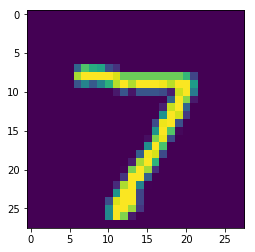

In [38]:
plt.imshow(test[0].reshape(28,28))
plt.show()

## Yellow represents values equal to 1
## Blue represents values equal to 0
## The conditional probability matrix(class 7) plot ,for the first test data whose true label is 7

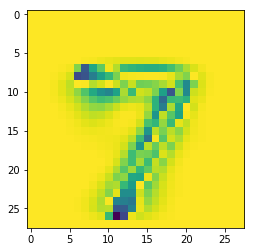

In [39]:
plt.imshow(cond_prob[7][0].reshape(28,28))
plt.show()

## From above graphs, we can see that conditional probabilities are  almost=1(color=yellow) at pixels that define the shape of number 7. So this will be classified as label 7

## Below are the plots of conditional probability matrix(for classes excluding 7) plots for the  first test data whose true label is 7

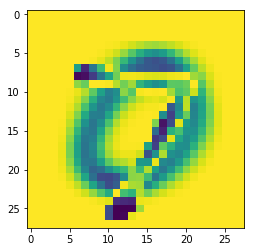

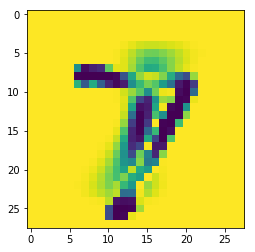

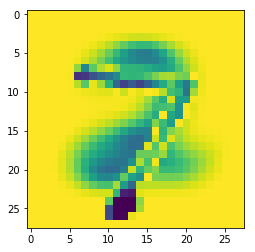

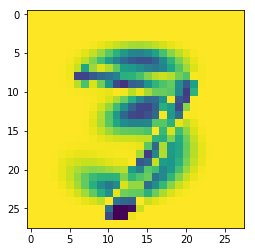

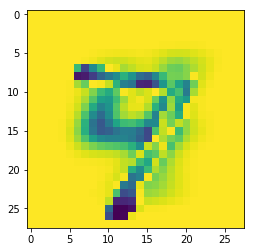

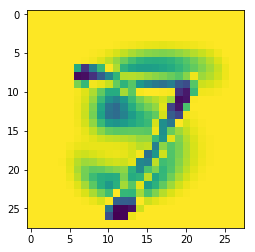

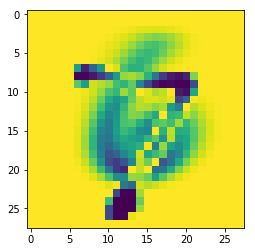

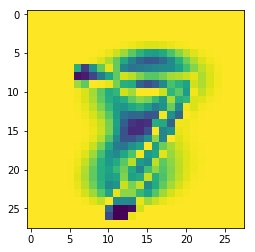

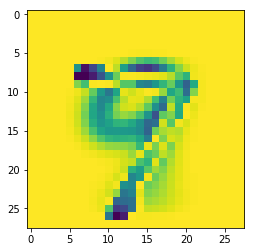

In [40]:
c=cond_prob[0][0].reshape(28,28)
plt.imshow(c)
plt.show()

plt.imshow(cond_prob[1][0].reshape(28,28))
plt.show()

plt.imshow(cond_prob[2][0].reshape(28,28))
plt.show()

plt.imshow(cond_prob[3][0].reshape(28,28))
plt.show()

plt.imshow(cond_prob[4][0].reshape(28,28))
plt.show()
plt.imshow(cond_prob[5][0].reshape(28,28))
plt.show()
plt.imshow(cond_prob[6][0].reshape(28,28))
plt.show()
plt.imshow(cond_prob[8][0].reshape(28,28))
plt.show()
plt.imshow(cond_prob[9][0].reshape(28,28))
plt.show()



#print(c.reshape(28,28))

## From the above conditional probabilities plots , we can see that conditional probabilities are equal to 0(color=blue) at pixels that define the shape of that particular class

# Question 2 (Logistic regression)

## Derivation of gradient descent
![title](./Capture.png)

In [41]:
train_norm=train/255
ones=np.ones([60000,1])
train_norm=np.hstack([ones,train_norm])
print(train_norm.shape)

(60000, 785)


In [42]:
trainlab_list=[]
for i in range(10):
        trainlab=np.empty([60000,1])
        trainlab[np.where(trainlabels==i)]=1
        trainlab[np.where(trainlabels!=i)]=-1
        trainlab_list.insert(i,trainlab)

In [ ]:
def error(l,t):
    count=len(np.where(l!=t)[0])
    return errors

In [43]:
def accuracy(l,t):
    count=len(np.where(l==t)[0])
    return (count/len(l))*100.0

In [44]:
def spc_accuracy(l,t):
    count=len(np.where(l==t)[0])
    print("count of truelabels class 1: ",len(np.where(t==1)[0]))
    print("count of truelabels class -1: ",len(np.where(t==-1)[0]))
    print("count of predicted labels class 1: ",len(np.where(l==1)[0]))
    print("count of predicted labels class -1: ",len(np.where(l==-1)[0]))
    print("right predicted: ",count)
    return (count/len(l))*100.0

In [45]:
def sig(x):
    return 1.0/(1.0+np.exp(-1.0*x))

In [46]:
def predict(x):
    #print(x.shape)
    pred=np.empty([x.shape[0],1])
    pred[np.where(x>=0.5)]=1
    pred[np.where(x<0.5)]=-1
    return pred

In [52]:
def grad_des(x,y,w):
    score=y*w*x.dot(w.T)
    temp=y*x*(1-sig(score))
    gd=-1.0*np.sum(temp,axis=0)+w
    return gd 
#grad_des(train_norm,trainlab,w).shape

In [53]:
def cost(x,y,w):
    score=y*x.dot(w.T)
    c=np.sum(np.log(1+np.exp(-score)),axis=0)+0.5*w.dot(w.T)
    return c
#cost(train_norm,trainlab,w).shape

In [59]:
weig=np.zeros([1,785])
weight=[weig]*10
print(len(weight))
print(weight[0].shape)

10
(1, 785)


In [ ]:
for i in range(10):
    print("training class ",i)
    acc=np.empty([150])
    for j in range(1,101):
        score=train_norm.dot(weight[i].T)
        pred=predict(sig(score))
        acc[j-1]=accuracy(pred,trainlab_list[i])
        gd=grad_des(train_norm,trainlab_list[i],weight[i])
        weight[i]=weight[i]-0.001*gd
    print("accuracy for train data for last 10 iterations ",acc[90:100])

In [ ]:
with open('./weight.p', 'wb') as y:
    pickle.dump(weight, y)    


In [64]:

with open('./weight.p', 'rb') as y:
    weights = pickle.load(y)
    

In [66]:
test_norm=test/255
one=np.ones([test.shape[0],1])
test_norm=np.hstack([one,test_norm])
testlab_list=[]
for i in range(10):
        testlab=np.empty([10000,1])
        testlab[np.where(testlabels==i)]=1
        testlab[np.where(testlabels!=i)]=-1
        testlab_list.insert(i,testlab)

In [68]:
testpred_list=[]
testacc=np.empty([10])
testerr=np.empty([10])
for i in range(10):
    print("class ",i)
    scores_test=test_norm.dot(weights[i].T)
    pred_test=predict(sig(scores_test))
    testacc[i]=spc_accuracy(pred_test,testlab_list[i])
    #testerr[i]=error(pred_test,testlab_list[i])
print(testacc)
#print(testerr)

class  0
count of truelabels class 1:  980
count of truelabels class -1:  9020
count of predicted labels class 1:  1011
count of predicted labels class -1:  8989
right predicted:  9905
class  1
count of truelabels class 1:  1135
count of truelabels class -1:  8865
count of predicted labels class 1:  1130
count of predicted labels class -1:  8870
right predicted:  9929
class  2
count of truelabels class 1:  1032
count of truelabels class -1:  8968
count of predicted labels class 1:  1008
count of predicted labels class -1:  8992
right predicted:  9772
class  3
count of truelabels class 1:  1010
count of truelabels class -1:  8990
count of predicted labels class 1:  729
count of predicted labels class -1:  9271
right predicted:  9683
class  4
count of truelabels class 1:  982
count of truelabels class -1:  9018
count of predicted labels class 1:  1001
count of predicted labels class -1:  8999
right predicted:  9793
class  5
count of truelabels class 1:  892
count of truelabels class -1: 

C:\Users\sthabass\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


## Accuracy of logistic regression for each class will be

In [71]:
print(testacc)
av_acc=np.mean(testacc)
print(av_acc)

[ 99.05  99.29  97.72  96.83  97.93  92.52  98.65  97.98  91.94  87.4 ]
95.931


In [72]:
print(np.mean(testacc))

95.931


In [ ]:
testpred_list=[]
testacc=np.empty([10])
testerr=np.empty([10])
predict_list=[]
for i in range(10):
    print("class ",i)
    scores_test=test_norm.dot(weights[i].T)
    pred_test=predict(sig(scores_test))
    testacc[i]=spc_accuracy(pred_test,testlab_list[i])
    #testerr[i]=error(pred_test,testlab_list[i])
print(testacc)

In [81]:
testpred_list=[]
testacc=np.empty([10])
testerr=np.empty([10])
prob_list=[]
for i in range(10):
    print("class ",i)
    scores_test=test_norm.dot(weights[i].T)
    pred_test=predict(sig(scores_test))
    test_prob=sig(scores_test)
    test_prob=test_prob.reshape(10000)
    prob_list.insert(i,test_prob)
    testacc[i]=spc_accuracy(pred_test,testlab_list[i])
    #testerr[i]=error(pred_test,testlab_list[i])
print(testacc)

class  0
count of truelabels class 1:  980
count of truelabels class -1:  9020
count of predicted labels class 1:  1011
count of predicted labels class -1:  8989
right predicted:  9905
class  1
count of truelabels class 1:  1135
count of truelabels class -1:  8865
count of predicted labels class 1:  1130
count of predicted labels class -1:  8870
right predicted:  9929
class  2
count of truelabels class 1:  1032
count of truelabels class -1:  8968
count of predicted labels class 1:  1008
count of predicted labels class -1:  8992
right predicted:  9772
class  3
count of truelabels class 1:  1010
count of truelabels class -1:  8990
count of predicted labels class 1:  729
count of predicted labels class -1:  9271
right predicted:  9683
class  4
count of truelabels class 1:  982
count of truelabels class -1:  9018
count of predicted labels class 1:  1001
count of predicted labels class -1:  8999
right predicted:  9793
class  5
count of truelabels class 1:  892
count of truelabels class -1: 

C:\Users\sthabass\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [91]:
prob_mat=np.array(prob_list)
print(prob_mat.shape)
prob_mat=prob_mat.T
print(prob_mat.shape)
prediction=np.argmax(prob_mat,axis=1)
accuracy_log=accuracy(prediction,testlabels)
print(accuracy_log)

(10, 10000)
(10000, 10)
82.56


## Accuracy of logistic regression is 82.56

## Confusion matrix classification of test data using logistic regression

In [90]:
confmat(prediction,testlabels)

actual     0.0   1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
predicted                                                   
0          938     0   10   10    2   12   12    4   47   11
1            0  1109    3    2    3    4    3    7   26    5
2            1     7  932   40    7    5   10   28   33    3
3            1     0    7  723    0    6    0    0    9    2
4            0     0    9    1  781   13   13    5   14   10
5           26     9   15  152    3  806   41    5  327   27
6            8     5   17   14   12   20  871    2   78    0
7            4     1   16   15    1    5    0  888   17    8
8            0     0    8    2    1    3    0    0  265    0
9            2     4   15   51  172   18    8   89  158  943


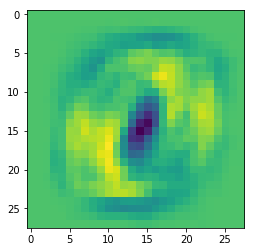

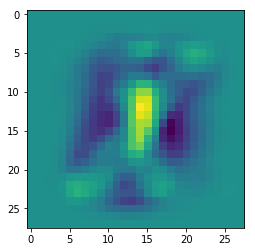

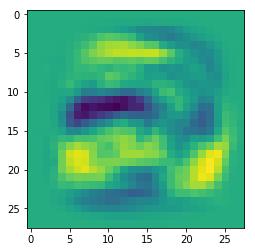

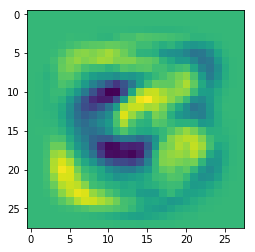

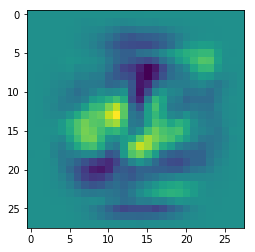

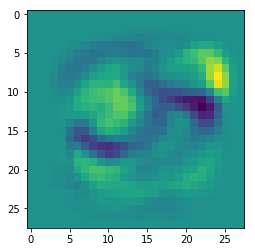

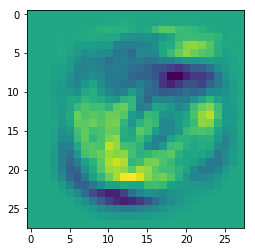

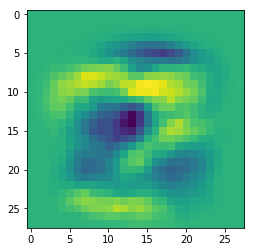

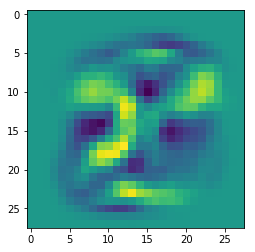

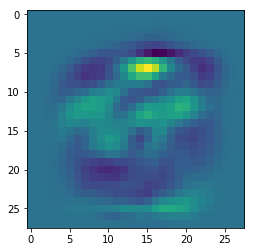

In [76]:
for i in range(10):
    w=weights[i]
    w=w[:,1:785]
    plt.imshow(w.reshape(28,28))
    plt.show()


## When weight vectors of logistic regression are plotted, we can see the blurred digit shape for each class weight vector 
## Weights at pixels that define the shape of number are higher compared to weights at other pixels